

## The _Normal_ distribution


The _normal_ distribution is sometimes informally called the _bell curve_. However, many other distributions are bell-shaped (such as Student's t and
logistic distributions). The _Normal_ distribution is the most common bell curve in statistics.

Also called the _Gaussian_ distribution for the famous mathematician Carl Friedrich Gauss who was an early pinoeer in this area.


<img src="images/gauss.png"  width="600" height="400">

<br>


A normal distribution is defined by two parameters:
1. The _mean_ (µ) which can be any real value.
2. The _standard deviation_ (σ) which can be any postive real value.


---

Relevant URLs:
- [Numpy - Generate Distributions](https://numpy.org/doc/stable/reference/random/generator.html#distributions)
- [Examples of Normal Distribution In Every Day Life](https://galtonboard.com/probabilityexamplesinlife)

---

**NOTE:** before walking through this notebook please make sure you understand how the Standard Deviation works (see appendix to chapter 2 in Naked Statistics pages 34-35)  

In [1]:
import os
import sys

# Import the regular expression module
import re

import numpy as np

import pandas as pd
from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns

from IPython.display import display, Markdown

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


In [3]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
/home/intsights/repos/repos-edu/repos-ds-math-python/ds-refinery
------------------------------
 
------------------------------
           src_dir            
/home/intsights/repos/repos-edu/repos-ds-math-python/ds-refinery/src
------------------------------
 


---

## PDF - Probability Density Function


- While the absolute likelihood for a ***continuous random variable*** to take on any ***particular value*** is ***0*** (since there are an infinite set of possible values to begin with), the PDF is used to specify the probability of the random variable falling within a ***particular range*** of values, as opposed to taking on any one value. 

- This probability is given by the ***integral*** of this variable's PDF ***over that range***. 
- The probability density function is ***nonnegative everywhere***, and its ***integral over the entire space is equal to one***.

<br>

**Key takeaway: probabilities are simply areas under a curve.**

<img src="images/normal-pdf.png">

The **_mean_** of the distribution determines the location of the center of the graph, and the **_standard deviation_** determines the height and width of the graph.

---

### Examples
- We'll draw 1 million samples from Normal distribution with various standard deviations.

In [4]:
sample_size = 1000000

samples_std1, stats1 = hf.generate_normal_dist(
    p_mean = 20, 
    p_std = 1, 
    p_size = sample_size
)

samples_std3, stats3 = hf.generate_normal_dist(
    p_mean = 20, 
    p_std = 3, 
    p_size = sample_size
)

samples_std10, stats10 = hf.generate_normal_dist(
    p_mean = 20, 
    p_std = 10, 
    p_size = sample_size
)

df = pd.DataFrame([stats1, stats3, stats10])

df.round(3)

,sample_count,mean,std,mean-3std,mean-2std,mean-1std,mean+1std,mean+2std,mean+3std,pctile-2.5,pctile-25,median,pctile-75,pctile-97.5,1-std-range-pct,2-std-range-pct,3-std-range-pct
0,1000000.0,19.998,1.000,16.998,17.998,18.998,20.998,21.998,22.998,18.039,19.323,19.999,20.673,21.959,0.683,0.955,0.997
1,1000000.0,20.000,3.004,10.987,13.992,16.996,23.005,26.009,29.014,14.108,17.977,20.002,22.025,25.886,0.683,0.954,0.997
2,1000000.0,20.002,10.009,-10.025,-0.016,9.993,30.012,40.021,50.030,0.395,13.246,20.009,26.746,39.612,0.682,0.955,0.997


**Some things to note**:
- The _mean_ and _median_ are always the same for a given normal distribution.
- The percent of data within a given standard deviation range (the integral) is the same for all normal distributions, regardless of the mean or standard deviation.   

Remember:
- If you look at **any** distribution and take a given percentile range, the amount of data (percent of total) will be the same. That is, after all, the definition of percentiles. 
- What is special about the **all** normal distributions: take any given std-range - the amount of data will be the same. This is a key point that should never be forgotten.  



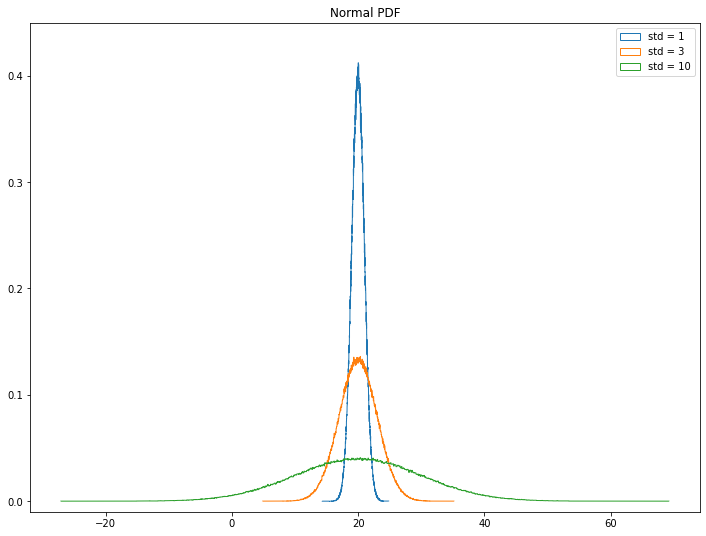

In [5]:
n_bins = int(np.sqrt(sample_size))


# Make histograms
_ = plt.hist(samples_std1,  bins=n_bins, density=True, histtype='step')
_ = plt.hist(samples_std3,  bins=n_bins, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=n_bins, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.45)
plt.title('Normal PDF')
plt.show()

Note how the peaks are all centered at the ***mean*** of 20.

---
## The Normal CDF

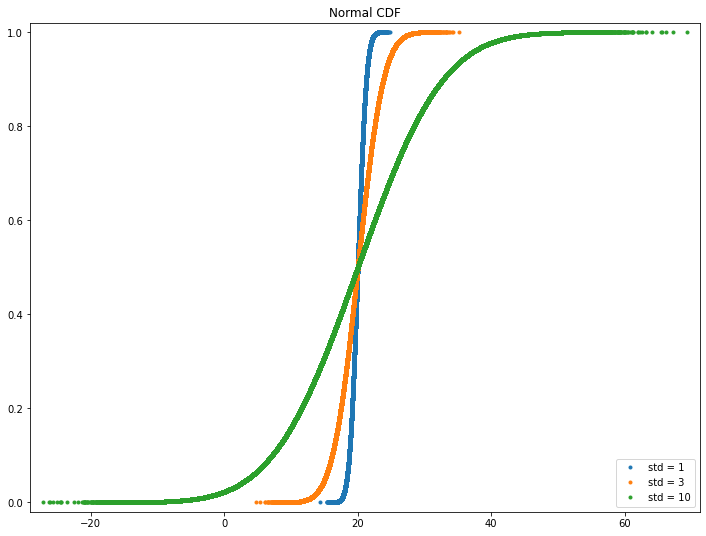

In [6]:
# Generate CDFs
x_std1, y_std1   = hf.ecdf(samples_std1)
x_std3, y_std3   = hf.ecdf(samples_std3)
x_std10, y_std10 = hf.ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1,  y_std1,  marker='.', linestyle='none')
_ = plt.plot(x_std3,  y_std3,  marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.title('Normal CDF')
plt.show()


- Note how the CDFs all pass through the mean (20 was used for each dist) at the 50th percentile; the **mean and median of a Normal distribution are equal**. 
- The width of the CDF varies with the standard deviation.


--- 

### Standard normal distribution
This is a special case of normal distribution where $\large \mu = 0$ and $\large \sigma = 1$ 

In [7]:
sample_size = 1000000

samples_standard_norm  = np.random.normal(
    loc   = 0,     # Mean ("center") of the distribution.
    scale = 1,     # Standard deviation (spread or "width") of the distribution. 
    size  = sample_size  
)


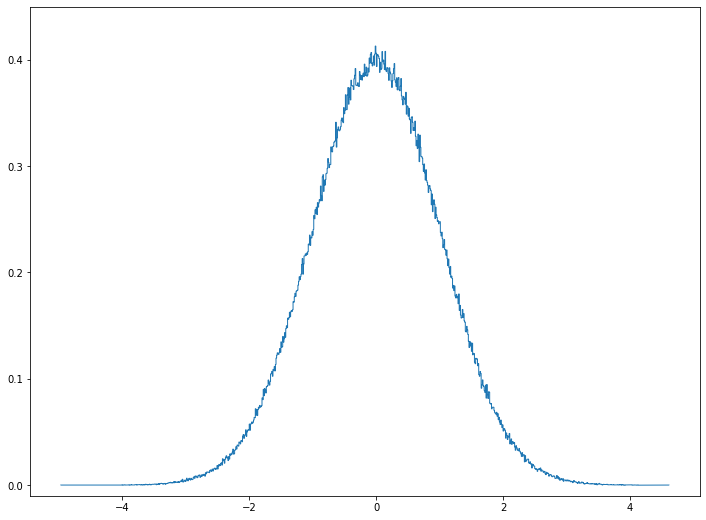

In [8]:
n_bins = int(np.sqrt(sample_size))

_ = plt.hist(samples_standard_norm,  bins=n_bins, density=True, histtype='step')

plt.ylim(-0.01, 0.45)
plt.show()

#### Let's compare the CDFs:

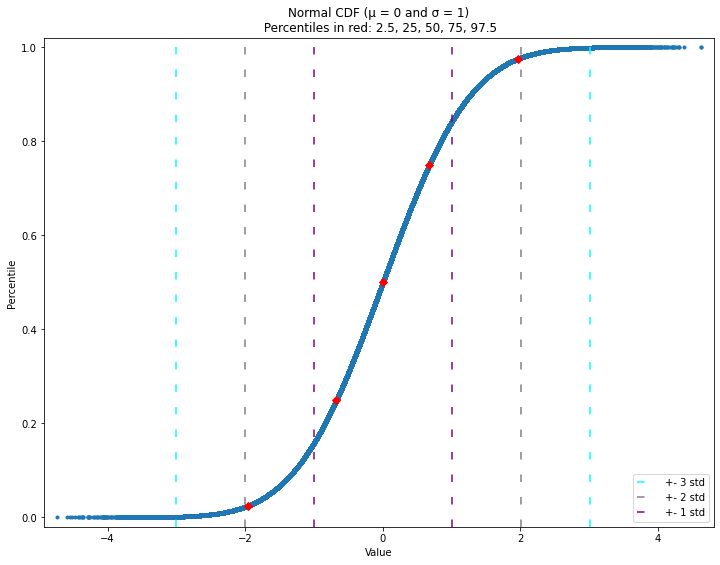

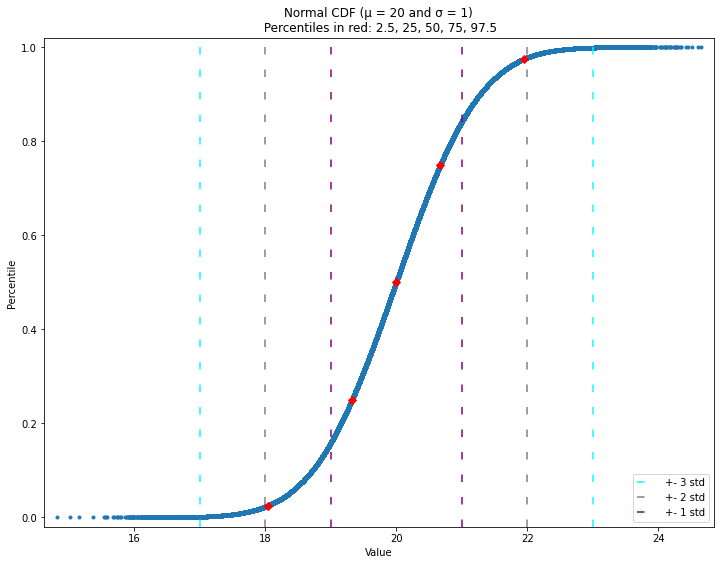

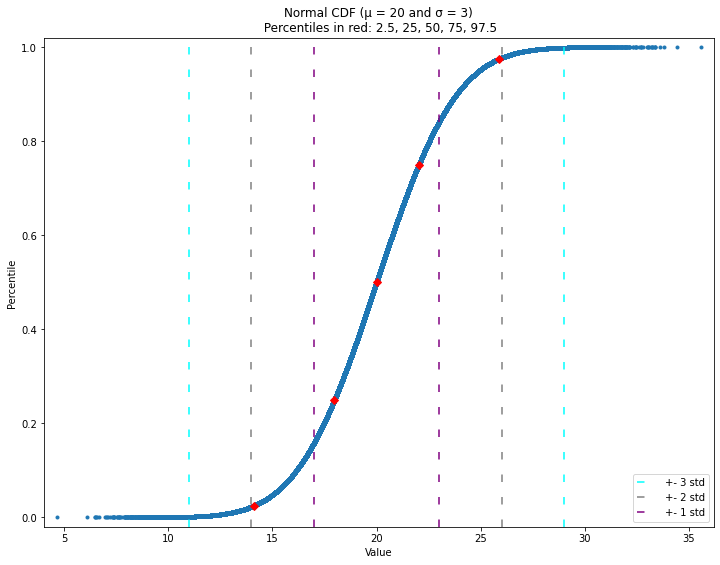

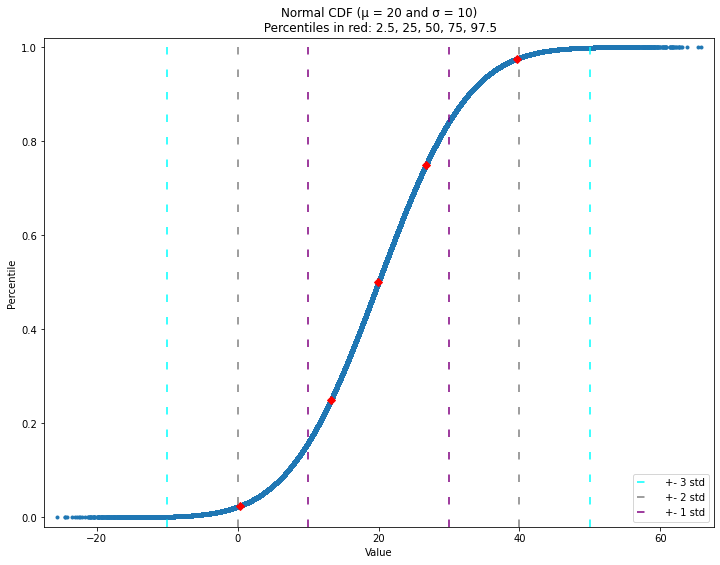

In [9]:
hf.generate_normal_dist_cdf(
    p_mean = 0, 
    p_std = 1, 
    p_size = 1000000
)

hf.generate_normal_dist_cdf(
    p_mean = 20, 
    p_std = 1, 
    p_size = 1000000
)

hf.generate_normal_dist_cdf(
    p_mean = 20, 
    p_std = 3, 
    p_size = 1000000
)

hf.generate_normal_dist_cdf(
    p_mean = 20, 
    p_std = 10, 
    p_size = 1000000
)

As mentioned above, notice how they all look exactly the same regardless of the mean or standard deviation!  

--- 

This leads us the next point ... any **normal distribution** can be converted to the **standard normal distribution**. This is important because the latter one is quite often much easier to reason with and also enables comparing different datasets.

In the **standard normal distribution** each value literally is the number of standard deviations it is from the mean. This value has many names: 
- standard score  
- z-score 
- z-value 
- normal score 
- standardized variable

<br>

--- 
Any point `x` from a normal distribution can be converted to the standard normal distribution `z` with the formula:

$z = \large \frac{x-\mu}{\sigma}$ 

Note, this is just a  simple linear transformation (in simple terms the proportions stay the same after converting). 

---

Let's try an example; generate a normal distribution with mean=20 and std=10.

In [10]:
samples, stats = hf.generate_normal_dist(
    p_mean = 20, 
    p_std = 10, 
    p_size = 1000000
)
 
df = pd.DataFrame({ 'x': samples})

df.head()

,x
0,18.271144
1,3.392406
2,42.888032
3,19.296092
4,17.694386


Let's add the z-score:

In [11]:
df['z'] = df.x.apply(
    lambda x: (x - stats['mean']) / stats['std']
)

df.head()

,x,z
0,18.271144,-0.170562
1,3.392406,-1.658506
2,42.888032,2.291243
3,19.296092,-0.068063
4,17.694386,-0.228241


However, there is a much easier and quicker way; use the `zscore` vectorized function instead: 

In [12]:
df['z-score'] = zscore(df['x'])

df.head()

,x,z,z-score
0,18.271144,-0.170562,-0.170562
1,3.392406,-1.658506,-1.658506
2,42.888032,2.291243,2.291243
3,19.296092,-0.068063,-0.068063
4,17.694386,-0.228241,-0.228241


Let's plot them:

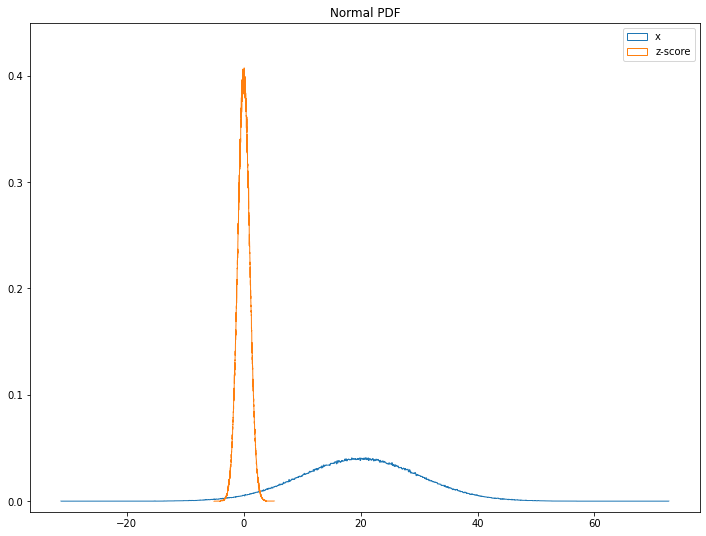

In [13]:
n_bins = int(np.sqrt(1000000))

# Make histograms
_ = plt.hist(df['x'],  bins=n_bins, density=True, histtype='step')
_ = plt.hist(df['z-score'],  bins=n_bins, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('x', 'z-score'))
plt.ylim(-0.01, 0.45)
plt.title('Normal PDF')
plt.show()

---

### Checking if a dataset is normally distributed

- If an empirical dataset does follow a normal distribution we can then model it using a normal distribution with the raw data's mean and std. 
- With that we can do a lot of cool things, such as get probablilites for values not even found in the collected raw data.
- Additionally, the raw data can be discarded if desried, all we need is the mean and std - talk about data compression!
- However, be super careful, and always remember [all models are wrong but some are useful](https://en.wikipedia.org/wiki/All_models_are_wrong)! 


#### Exercise - are the Belmont Stakes results normally distributed?
- Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. 
- [Secretariat](https://en.wikipedia.org/wiki/Secretariat_(horse)) ran the fastest Belmont Stakes in history in 1973. 
- While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. 
- The dataset below has those two outliers removed. 

In [14]:
belmont_no_outliers = np.array([
    148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
    149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
    151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
    146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
    147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
    149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
    149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
    150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
    148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
    149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
    149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
    152.2 
])

In [15]:
# Compute mean and standard deviation: 
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

print(mu, sigma)

149.22101123595507 1.6186456017743405


In [16]:
# Sample out of a normal distribution with this mu and sigma: 
samples = np.random.normal(mu, sigma, size=1000000)

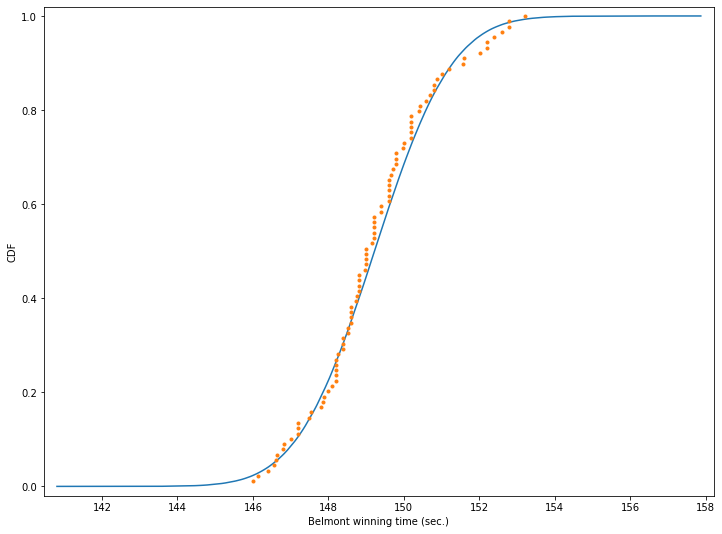

In [17]:
# Get the CDF of the samples and of the data
x_theor, y_theor = hf.ecdf(samples)
x, y             = hf.ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')

plt.show()


- The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. 
-  This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

---
#### What are the chances of a horse matching or beating Secretariat's record?
- Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed)
- What is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of **144 seconds**.

In [18]:
# Compute the fraction that are faster than 144 seconds: 
np.sum(samples <= 144.0) / len(samples)

0.000586

There is only a **0.06% chance** of a horse running the Belmont as fast as Secretariat.

Note, we had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. 
